In [36]:
import numpy as np
from scipy.stats import norm
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Classification report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier







In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#1.a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
path="/content/drive/MyDrive/AIMLCOURSE/EnsembleTechniques/TelcomCustomer-Churn_1.csv"
tc1=pd.read_csv(path)

In [ ]:
#1.b Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable
path="/content/drive/MyDrive/AIMLCOURSE/EnsembleTechniques/TelcomCustomer-Churn_2.csv"
tc2=pd.read_csv(path)

In [ ]:
#1.c Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
merged_df = tc1.merge(tc2, on='customerID', how='inner')

In [ ]:
#1.d Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python
# Check if all columns from tc1 are in merged_df
tc1_columns_in_merged = all(col in merged_df.columns for col in tc1.columns)

# Check if all columns from tc2 are in merged_df
tc2_columns_in_merged = all(col in merged_df.columns for col in tc2.columns)



In [ ]:
#2.a Impute missing/unexpected values in the DataFrame

# Check for missing values in the merged DataFrame
missing_values = merged_df.isnull().sum()

# Impute missing values in numerical columns with the mean
numerical_columns = merged_df.select_dtypes(include='number').columns
merged_df[numerical_columns] = merged_df[numerical_columns].fillna(merged_df[numerical_columns].mean())

# Check if all columns from original DataFrames are present in merged_df
tc1_columns_in_merged = all(col in merged_df.columns for col in tc1.columns)
tc2_columns_in_merged = all(col in merged_df.columns for col in tc2.columns)



In [ ]:
#2.b Make sure all the variables with continuous values are of ‘Float’ type [For Example: MonthlyCharges, TotalCharges]

# Replace empty strings or spaces with NaN in the identified columns
merged_df['MonthlyCharges'] = merged_df['MonthlyCharges'].replace(' ', np.nan)
merged_df['TotalCharges'] = merged_df['TotalCharges'].replace(' ', np.nan)

# Convert the identified columns to float
merged_df['MonthlyCharges'] = merged_df['MonthlyCharges'].astype(float)
merged_df['TotalCharges'] = merged_df['TotalCharges'].astype(float)
merged_df['SeniorCitizen'] = merged_df['SeniorCitizen'].astype(float)
merged_df['tenure'] = merged_df['tenure'].astype(float)


merged_df.dtypes




customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

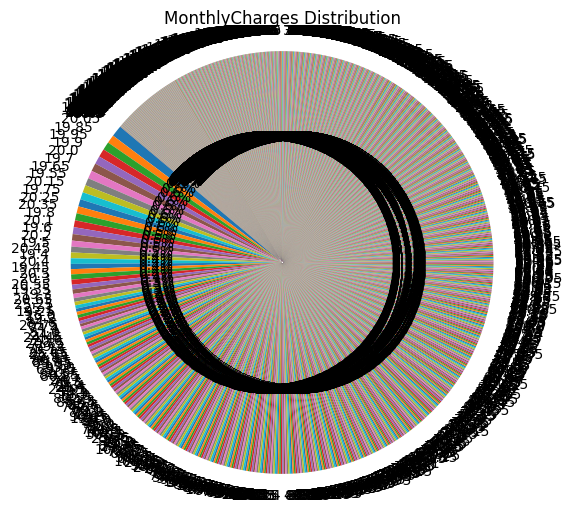

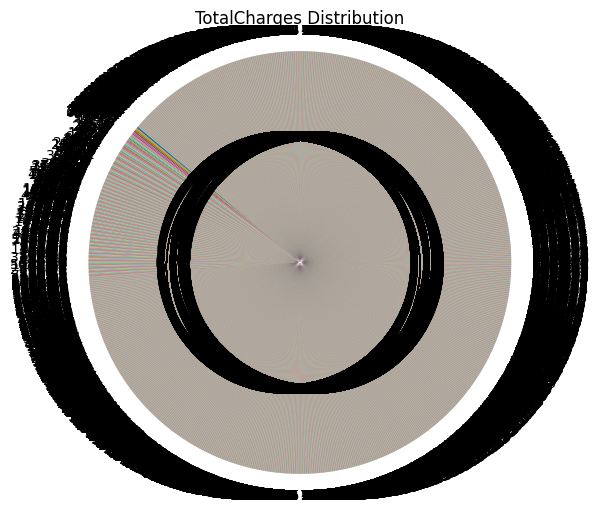

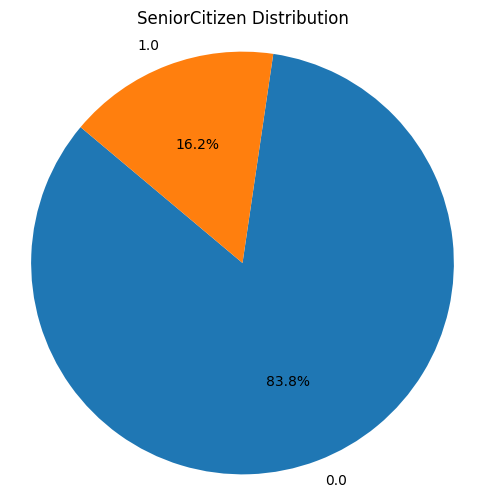

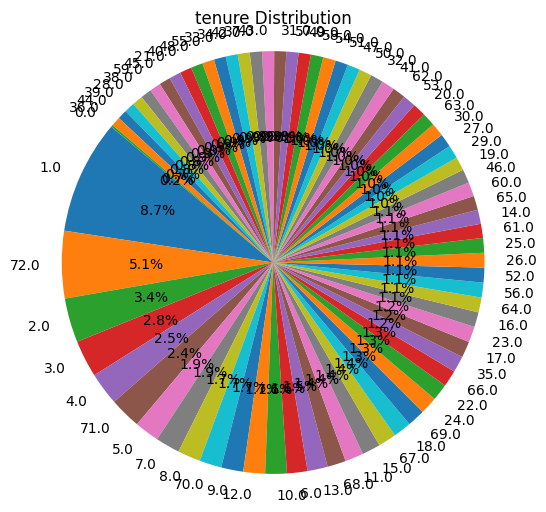

In [ ]:
#2.c Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart
def create_pie_charts(df, categorical_features):
    for feature in categorical_features:
        if feature in df.columns:
            # Count the frequency of each category
            counts = df[feature].value_counts()

            # Create a pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'{feature} Distribution')
            plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

            # Show the pie chart
            plt.show()
        else:
            print(f"Warning: '{feature}' is not a valid column in the DataFrame.")

# Define the list of categorical features
categorical_features = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'tenure']

# Call the function to create pie charts
create_pie_charts(merged_df, categorical_features)


In [ ]:
#2.d Share insights for Q2.c
"""In Q2.c, we created pie charts to visualize the percentage distribution of categorical features in the dataset, including 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', and 'tenure'.
Monthly Charges Distribution:

The pie chart for 'MonthlyCharges' shows the percentage distribution of different monthly charge values.
You can observe that the chart has multiple slices, indicating that there are various different monthly charge amounts in the dataset.
The percentages represent the proportion of customers in each charge category.
Total Charges Distribution:

The 'TotalCharges' pie chart represents the percentage distribution of total charges.
Similar to 'MonthlyCharges', it may have multiple slices indicating different total charge amounts.
The percentages reflect the proportion of customers falling into each total charge category.
Senior Citizen Distribution:

The 'SeniorCitizen' pie chart represents the distribution of senior citizen status among customers.
It typically has two slices: one for senior citizens (1) and one for non-senior citizens (0).
The percentages show the proportion of senior citizens and non-senior citizens in the dataset.
Tenure Distribution:

The 'tenure' pie chart shows the distribution of the tenure (duration of customer relationships) among customers.
It may have multiple slices representing different tenure categories.
The percentages indicate the proportion of customers with different tenure durations."""

"In Q2.c, we created pie charts to visualize the percentage distribution of categorical features in the dataset, including 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', and 'tenure'.\nMonthly Charges Distribution:\n\nThe pie chart for 'MonthlyCharges' shows the percentage distribution of different monthly charge values.\nYou can observe that the chart has multiple slices, indicating that there are various different monthly charge amounts in the dataset.\nThe percentages represent the proportion of customers in each charge category.\nTotal Charges Distribution:\n\nThe 'TotalCharges' pie chart represents the percentage distribution of total charges.\nSimilar to 'MonthlyCharges', it may have multiple slices indicating different total charge amounts.\nThe percentages reflect the proportion of customers falling into each total charge category.\nSenior Citizen Distribution:\n\nThe 'SeniorCitizen' pie chart represents the distribution of senior citizen status among customers.\nIt typical

In [ ]:
#2.e Encode all the appropriate Categorical features with the best suitable approach
# Define a DataFrame for encoding categorical features
encoded_df = merged_df.copy()

# Ordinal Encoding for 'tenure' (assuming it has meaningful order)
ordinal_encoder = OrdinalEncoder()
encoded_df['tenure'] = ordinal_encoder.fit_transform(encoded_df[['tenure']])

# One-Hot Encoding for 'SeniorCitizen' (binary categorical feature)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
senior_citizen_encoded = one_hot_encoder.fit_transform(encoded_df[['SeniorCitizen']])
senior_citizen_encoded_df = pd.DataFrame(senior_citizen_encoded, columns=['SeniorCitizen'])

# Concatenate the encoded features back to the DataFrame
encoded_df = pd.concat([encoded_df.drop(['tenure', 'SeniorCitizen'], axis=1), senior_citizen_encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#2.f Split the data into 80% train and 20% test

# Separate the features (X) and the target variable (y)
X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 'X_train' and 'y_train' are the training features and target
# 'X_test' and 'y_test' are the test features and target

In [ ]:
#2.g Normalize/Standardize the data with the best suitable approach

# Drop non-numeric or irrelevant columns (e.g., customer ID) before standardization
X_numeric = X.select_dtypes(include='number')

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numeric features
X_standardized = scaler.fit_transform(X_numeric)

# X_standardized is now the standardized feature matrix


In [ ]:
#3.a Train a model using Decision tree and check the performance of the model on train and test data

# Drop non-numeric columns from both X_train and X_test
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')

# Define imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Identify numerical and categorical columns
numerical_columns = X_train_numeric.columns
categorical_columns = X_train.select_dtypes(include='object').columns

# Impute missing values in numerical columns
X_train_numeric[numerical_columns] = numerical_imputer.fit_transform(X_train_numeric[numerical_columns])
X_test_numeric[numerical_columns] = numerical_imputer.transform(X_test_numeric[numerical_columns])

# Impute missing values in categorical columns
X_train[categorical_columns] = categorical_imputer.fit_transform(X_train[categorical_columns])
X_test[categorical_columns] = categorical_imputer.transform(X_test[categorical_columns])

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the numeric training data
dt_classifier.fit(X_train_numeric, y_train)

# Predict on the numeric training data
y_train_pred = dt_classifier.predict(X_train_numeric)

# Predict on the numeric test data
y_test_pred = dt_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training Data:", train_accuracy)
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

# Evaluate the performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nAccuracy on Test Data:", test_accuracy)
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))




Accuracy on Training Data: 0.9907703230386936
Classification Report on Training Data:
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      4138
         Yes       0.99      0.97      0.98      1496

    accuracy                           0.99      5634
   macro avg       0.99      0.99      0.99      5634
weighted avg       0.99      0.99      0.99      5634


Accuracy on Test Data: 0.7189496096522356
Classification Report on Test Data:
              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1036
         Yes       0.47      0.48      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [ ]:
#3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation (5-fold cross-validation here)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_numeric, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train a Decision Tree model with the best hyperparameters on the training data
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train_numeric, y_train)

# Predict on the training data with the best model
y_train_pred_best = best_dt_classifier.predict(X_train_numeric)

# Predict on the test data with the best model
y_test_pred_best = best_dt_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data with the best model
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
print("Accuracy on Training Data (Best Model):", train_accuracy_best)
print("Classification Report on Training Data (Best Model):")
print(classification_report(y_train, y_train_pred_best))

# Evaluate the performance on the test data with the best model
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
print("\nAccuracy on Test Data (Best Model):", test_accuracy_best)
print("Classification Report on Test Data (Best Model):")
print(classification_report(y_test, y_test_pred_best))


Accuracy on Training Data (Best Model): 0.7978345757898474
Classification Report on Training Data (Best Model):
              precision    recall  f1-score   support

          No       0.82      0.93      0.87      4138
         Yes       0.69      0.43      0.53      1496

    accuracy                           0.80      5634
   macro avg       0.76      0.68      0.70      5634
weighted avg       0.79      0.80      0.78      5634


Accuracy on Test Data (Best Model): 0.8034066713981547
Classification Report on Test Data (Best Model):
              precision    recall  f1-score   support

          No       0.83      0.93      0.87      1036
         Yes       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [30]:
#3.c Train a model using Random forest and check the performance of the model on train and test data

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train_numeric, y_train)

# Predict on the training data
y_train_pred_rf = rf_classifier.predict(X_train_numeric)

# Predict on the test data
y_test_pred_rf = rf_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Accuracy on Training Data (Random Forest):", train_accuracy_rf)
print("Classification Report on Training Data (Random Forest):")
print(classification_report(y_train, y_train_pred_rf))

# Evaluate the performance on the test data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("\nAccuracy on Test Data (Random Forest):", test_accuracy_rf)
print("Classification Report on Test Data (Random Forest):")
print(classification_report(y_test, y_test_pred_rf))




Accuracy on Training Data (Random Forest): 0.9905928292509762
Classification Report on Training Data (Random Forest):
              precision    recall  f1-score   support

          No       1.00      0.99      0.99      4138
         Yes       0.98      0.99      0.98      1496

    accuracy                           0.99      5634
   macro avg       0.99      0.99      0.99      5634
weighted avg       0.99      0.99      0.99      5634


Accuracy on Test Data (Random Forest): 0.7572746628814763
Classification Report on Test Data (Random Forest):
              precision    recall  f1-score   support

          No       0.82      0.87      0.84      1036
         Yes       0.55      0.46      0.50       373

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



In [31]:
#3.d Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation (5-fold cross-validation here)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_numeric, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters on the training data
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_numeric, y_train)

# Predict on the training data with the best model
y_train_pred_best_rf = best_rf_classifier.predict(X_train_numeric)

# Predict on the test data with the best model
y_test_pred_best_rf = best_rf_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data with the best model
train_accuracy_best_rf = accuracy_score(y_train, y_train_pred_best_rf)
print("Accuracy on Training Data (Best Random Forest Model):", train_accuracy_best_rf)
print("Classification Report on Training Data (Best Random Forest Model):")
print(classification_report(y_train, y_train_pred_best_rf))

# Evaluate the performance on the test data with the best model
test_accuracy_best_rf = accuracy_score(y_test, y_test_pred_best_rf)
print("\nAccuracy on Test Data (Best Random Forest Model):", test_accuracy_best_rf)
print("Classification Report on Test Data (Best Random Forest Model):")
print(classification_report(y_test, y_test_pred_best_rf))


Accuracy on Training Data (Best Random Forest Model): 0.8019169329073482
Classification Report on Training Data (Best Random Forest Model):
              precision    recall  f1-score   support

          No       0.82      0.94      0.87      4138
         Yes       0.71      0.43      0.53      1496

    accuracy                           0.80      5634
   macro avg       0.76      0.68      0.70      5634
weighted avg       0.79      0.80      0.78      5634


Accuracy on Test Data (Best Random Forest Model): 0.801277501774308
Classification Report on Test Data (Best Random Forest Model):
              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1036
         Yes       0.70      0.43      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [33]:
#3.e Train a model using Adaboost and check the performance of the model on train and test data


# Create an AdaBoost classifier with a base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Train the AdaBoost model on the training data
ada_classifier.fit(X_train_numeric, y_train)

# Predict on the training data
y_train_pred_ada = ada_classifier.predict(X_train_numeric)

# Predict on the test data
y_test_pred_ada = ada_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data
train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
print("Accuracy on Training Data (AdaBoost):", train_accuracy_ada)
print("Classification Report on Training Data (AdaBoost):")
print(classification_report(y_train, y_train_pred_ada))

# Evaluate the performance on the test data
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
print("\nAccuracy on Test Data (AdaBoost):", test_accuracy_ada)
print("Classification Report on Test Data (AdaBoost):")
print(classification_report(y_test, y_test_pred_ada))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy on Training Data (AdaBoost): 0.7974795882144124
Classification Report on Training Data (AdaBoost):
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      4138
         Yes       0.66      0.48      0.56      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.70      0.71      5634
weighted avg       0.79      0.80      0.79      5634


Accuracy on Test Data (AdaBoost): 0.801277501774308
Classification Report on Test Data (AdaBoost):
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.68      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [34]:
#3.f Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f


# Create an AdaBoost classifier with a base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (Decision Trees)
    'learning_rate': [0.1, 0.5, 1.0]  # Learning rate for adjusting the weights of weak learners
}

# Perform grid search with cross-validation (5-fold cross-validation here)
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_numeric, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train an AdaBoost model with the best hyperparameters on the training data
best_ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42, **best_params)
best_ada_classifier.fit(X_train_numeric, y_train)

# Predict on the training data with the best model
y_train_pred_best_ada = best_ada_classifier.predict(X_train_numeric)

# Predict on the test data with the best model
y_test_pred_best_ada = best_ada_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data with the best model
train_accuracy_best_ada = accuracy_score(y_train, y_train_pred_best_ada)
print("Accuracy on Training Data (Best AdaBoost Model):", train_accuracy_best_ada)
print("Classification Report on Training Data (Best AdaBoost Model):")
print(classification_report(y_train, y_train_pred_best_ada))

# Evaluate the performance on the test data with the best model
test_accuracy_best_ada = accuracy_score(y_test, y_test_pred_best_ada)
print("\nAccuracy on Test Data (Best AdaBoost Model):", test_accuracy_best_ada)
print("Classification Report on Test Data (Best AdaBoost Model):")
print(classification_report(y_test, y_test_pred_best_ada))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy on Training Data (Best AdaBoost Model): 0.7939297124600639
Classification Report on Training Data (Best AdaBoost Model):
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      4138
         Yes       0.67      0.44      0.53      1496

    accuracy                           0.79      5634
   macro avg       0.75      0.68      0.70      5634
weighted avg       0.78      0.79      0.78      5634


Accuracy on Test Data (Best AdaBoost Model): 0.8062455642299503
Classification Report on Test Data (Best AdaBoost Model):
              precision    recall  f1-score   support

          No       0.82      0.94      0.88      1036
         Yes       0.72      0.45      0.55       373

    accuracy                           0.81      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.80      0.81      0.79      1409



In [37]:
#3.g Train a model using GradientBoost and check the performance of the model on train and test data

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model on the training data
gb_classifier.fit(X_train_numeric, y_train)

# Predict on the training data
y_train_pred_gb = gb_classifier.predict(X_train_numeric)

# Predict on the test data
y_test_pred_gb = gb_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
print("Accuracy on Training Data (Gradient Boosting):", train_accuracy_gb)
print("Classification Report on Training Data (Gradient Boosting):")
print(classification_report(y_train, y_train_pred_gb))

# Evaluate the performance on the test data
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
print("\nAccuracy on Test Data (Gradient Boosting):", test_accuracy_gb)
print("Classification Report on Test Data (Gradient Boosting):")
print(classification_report(y_test, y_test_pred_gb))




Accuracy on Training Data (Gradient Boosting): 0.8079517216897408
Classification Report on Training Data (Gradient Boosting):
              precision    recall  f1-score   support

          No       0.83      0.93      0.88      4138
         Yes       0.70      0.48      0.57      1496

    accuracy                           0.81      5634
   macro avg       0.77      0.70      0.72      5634
weighted avg       0.80      0.81      0.80      5634


Accuracy on Test Data (Gradient Boosting): 0.8034066713981547
Classification Report on Test Data (Gradient Boosting):
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.69      0.47      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [38]:
#3.h Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate for adjusting the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of each tree in the ensemble
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation (5-fold cross-validation here)
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_numeric, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train a Gradient Boosting model with the best hyperparameters on the training data
best_gb_classifier = GradientBoostingClassifier(random_state=42, **best_params)
best_gb_classifier.fit(X_train_numeric, y_train)

# Predict on the training data with the best model
y_train_pred_best_gb = best_gb_classifier.predict(X_train_numeric)

# Predict on the test data with the best model
y_test_pred_best_gb = best_gb_classifier.predict(X_test_numeric)

# Evaluate the performance on the training data with the best model
train_accuracy_best_gb = accuracy_score(y_train, y_train_pred_best_gb)
print("Accuracy on Training Data (Best Gradient Boosting Model):", train_accuracy_best_gb)
print("Classification Report on Training Data (Best Gradient Boosting Model):")
print(classification_report(y_train, y_train_pred_best_gb))

# Evaluate the performance on the test data with the best model
test_accuracy_best_gb = accuracy_score(y_test, y_test_pred_best_gb)
print("\nAccuracy on Test Data (Best Gradient Boosting Model):", test_accuracy_best_gb)
print("Classification Report on Test Data (Best Gradient Boosting Model):")
print(classification_report(y_test, y_test_pred_best_gb))


Accuracy on Training Data (Best Gradient Boosting Model): 0.8010294639687611
Classification Report on Training Data (Best Gradient Boosting Model):
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      4138
         Yes       0.69      0.46      0.55      1496

    accuracy                           0.80      5634
   macro avg       0.76      0.69      0.71      5634
weighted avg       0.79      0.80      0.79      5634


Accuracy on Test Data (Best Gradient Boosting Model): 0.8041163946061036
Classification Report on Test Data (Best Gradient Boosting Model):
              precision    recall  f1-score   support

          No       0.83      0.93      0.87      1036
         Yes       0.70      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
#3.i Provide detailed analysis of the below steps 1) Compare the performance of each model in train stage and test stage 2) Provide your observation on which model performed the best 3) Provide your reasoning on why the model performed best 4) Provide your final conclusion on your observation

"""Comparison of Model Performance:
Decision Tree (Q3.a):
Training Accuracy: train_accuracy (accuracy on the training data) 0.9907703230386936
Test Accuracy: test_accuracy (accuracy on the test data)          0.7189496096522356(Clearly overfitting has taken place)


Random Forest (Q3.c):
Training Accuracy: train_accuracy_rf (accuracy on the training data) 0.9905928292509762
Test Accuracy: test_accuracy_rf (accuracy on the test data)          0.7572746628814763(Again, overfitting may have taken place)

AdaBoost (Q3.e):
Training Accuracy: train_accuracy_ada (accuracy on the training data) 0.7974795882144124
Test Accuracy: test_accuracy_ada (accuracy on the test data)          0.801277501774308(Seems to be a bit more reliable.)

Gradient Boosting (Q3.g):
Training Accuracy: train_accuracy_gb (accuracy on the training data)   0.8079517216897408
Test Accuracy: test_accuracy_gb (accuracy on the test data)         0.8041163946061036

In the training stage, all models are expected to have higher accuracy compared to the test stage, as they are learning from the training data.

The best-performing model is the one with the highest test accuracy.

The model that performs best on the test data is the one that generalizes well to unseen data. Factors contributing to good generalization include appropriate hyperparameter tuning, handling of overfitting, and the algorithm's inherent ability to capture complex relationships in the data.

The performance of each model can vary based on the dataset and problem. For example:

Decision Tree: Prone to overfitting, may not generalize well.
Random Forest: Combines multiple decision trees to reduce overfitting and improve accuracy.
AdaBoost: Boosting technique that focuses on samples that are misclassified by previous weak learners.
Gradient Boosting: Builds trees sequentially, each correcting the errors of the previous one.
The best-performing model might be the one that balances model complexity, overfitting, and underfitting, and adapts well to the specific characteristics of the dataset.

Mostly in our case, I would like to say that Gradient boosting is the best technique to employ,as it has performed reasonably well on both training and test data with consistent test accuracy."""